In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_excel("CC_expenditure.xlsx")
df.head()

,Sl No:,Customer,Segment,Product,Date,Type,Amount spent,Amount repaid
0,1,A1,Self Employed,Gold,2004-01-12,JEWELLERY,485470.80,495414.75
1,2,A1,Self Employed,Gold,2004-01-03,FUEL,410556.13,245899.02
2,3,A1,Self Employed,Gold,2004-01-15,CLOTHES,23740.46,259490.06
3,4,A1,Self Employed,Gold,2004-01-25,FOOD,484342.47,437555.12
4,5,A1,Self Employed,Gold,2005-01-17,CAMERA,369694.07,165972.88


In [19]:
df.Date = pd.to_datetime(df['Date'])

In [26]:
df['Date'].dt.month

0       1
1       1
2       1
3       1
4       1
       ..
1495    2
1496    3
1497    3
1498    3
1499    3
Name: Date, Length: 1500, dtype: int64

1.	Extract the month and year from the Date column using appropriate functions. 

In [11]:
df["Month"] = df["Date"].dt.month_name()
df["Year"] = df["Date"].dt.year

In [12]:
df.head()

,Sl No:,Customer,Segment,Product,Date,Type,Amount spent,Amount repaid,Month,Year
0,1,A1,Self Employed,Gold,2004-01-12,JEWELLERY,485470.80,495414.75,January,2004
1,2,A1,Self Employed,Gold,2004-01-03,FUEL,410556.13,245899.02,January,2004
2,3,A1,Self Employed,Gold,2004-01-15,CLOTHES,23740.46,259490.06,January,2004
3,4,A1,Self Employed,Gold,2004-01-25,FOOD,484342.47,437555.12,January,2004
4,5,A1,Self Employed,Gold,2005-01-17,CAMERA,369694.07,165972.88,January,2005


2.	Conduct a segment-wise analysis of expenditure and repayment by the customers across the years in question.

In [39]:
df.groupby(['Segment','Year']).mean()[['Amount spent','Amount repaid']]

Amount spent  Amount repaid
Segment       Year                              
Govt          2004  221715.510000  228019.607568
              2005  220804.596087  240978.577283
              2006  247979.612778  248778.109722
Normal Salary 2004  246908.400236  234850.025433
              2005  264088.639078  233664.145106
              2006  225514.923006  261810.074046
Salaried_MNC  2004  260576.194000  264863.717067
              2005  207076.246625  272690.540500
              2006  248756.644719  242091.942584
Salaried_Pvt  2004  264846.524648  247623.863521
              2005  253271.016321  243770.227170
              2006  250110.646848  235021.285109
Self Employed 2004  255290.961528  271039.693611
              2005  243648.109115  248815.030973
              2006  238051.805747  252388.129195

In [32]:
pd.pivot_table(df,index=['Segment','Year'],values=['Amount spent','Amount repaid'],)

Amount repaid   Amount spent
Segment       Year                              
Govt          2004  228019.607568  221715.510000
              2005  240978.577283  220804.596087
              2006  248778.109722  247979.612778
Normal Salary 2004  234850.025433  246908.400236
              2005  233664.145106  264088.639078
              2006  261810.074046  225514.923006
Salaried_MNC  2004  264863.717067  260576.194000
              2005  272690.540500  207076.246625
              2006  242091.942584  248756.644719
Salaried_Pvt  2004  247623.863521  264846.524648
              2005  243770.227170  253271.016321
              2006  235021.285109  250110.646848
Self Employed 2004  271039.693611  255290.961528
              2005  248815.030973  243648.109115
              2006  252388.129195  238051.805747

In [5]:
df.pivot_table(index=["Year","Segment"], values=["Amount spent", "Amount repaid"], aggfunc="mean")

Amount repaid   Amount spent
Year Segment                                    
2004 Govt           228019.607568  221715.510000
     Normal Salary  234850.025433  246908.400236
     Salaried_MNC   264863.717067  260576.194000
     Salaried_Pvt   247623.863521  264846.524648
     Self Employed  271039.693611  255290.961528
2005 Govt           240978.577283  220804.596087
     Normal Salary  233664.145106  264088.639078
     Salaried_MNC   272690.540500  207076.246625
     Salaried_Pvt   243770.227170  253271.016321
     Self Employed  248815.030973  243648.109115
2006 Govt           248778.109722  247979.612778
     Normal Salary  261810.074046  225514.923006
     Salaried_MNC   242091.942584  248756.644719
     Salaried_Pvt   235021.285109  250110.646848
     Self Employed  252388.129195  238051.805747

3.	What’s your take on the movement of repayment behaviour of the customers over the years in consideration?

In [6]:
df["Month_order"] = df["Date"].dt.month
df.head()

,Sl No:,Customer,Segment,Product,Date,Type,Amount spent,Amount repaid,Month,Year,Month_order
0,1,A1,Self Employed,Gold,2004-01-12,JEWELLERY,485470.80,495414.75,January,2004,1
1,2,A1,Self Employed,Gold,2004-01-03,FUEL,410556.13,245899.02,January,2004,1
2,3,A1,Self Employed,Gold,2004-01-15,CLOTHES,23740.46,259490.06,January,2004,1
3,4,A1,Self Employed,Gold,2004-01-25,FOOD,484342.47,437555.12,January,2004,1
4,5,A1,Self Employed,Gold,2005-01-17,CAMERA,369694.07,165972.88,January,2005,1


In [7]:
repay_df = df.pivot_table(index=["Year","Month_order","Month"], values=["Amount repaid"], aggfunc="mean")
repay_df

Amount repaid
Year Month_order Month                   
2004 1           January    248839.599511
     2           February   236745.639643
     3           March      243941.665714
     4           April      272055.627500
     5           May        226604.377143
     9           September  230077.797143
     11          November   229386.352143
2005 1           January    196615.430357
     2           February   263906.451250
     4           April      249377.405714
     5           May        240969.149286
     6           June       217940.918810
     7           July       264188.297857
     8           August     234056.370714
     9           September  174762.825714
     10          October    256791.863571
     11          November   245651.498571
     12          December   325930.967143
2006 1           January    242672.027143
     2           February   249520.686429
     3           March      255599.066267
     4           April      239652.372553
     5           May        253574.374286
     6           June       324870.033571
     7           July       204736.559643
     8           August     263206.928571
     9           September  264404.009286
     10          October    271987.877857
     11          November   245622.959643
     12          December   204621.001429

<AxesSubplot:xlabel='Year,Month_order,Month'>

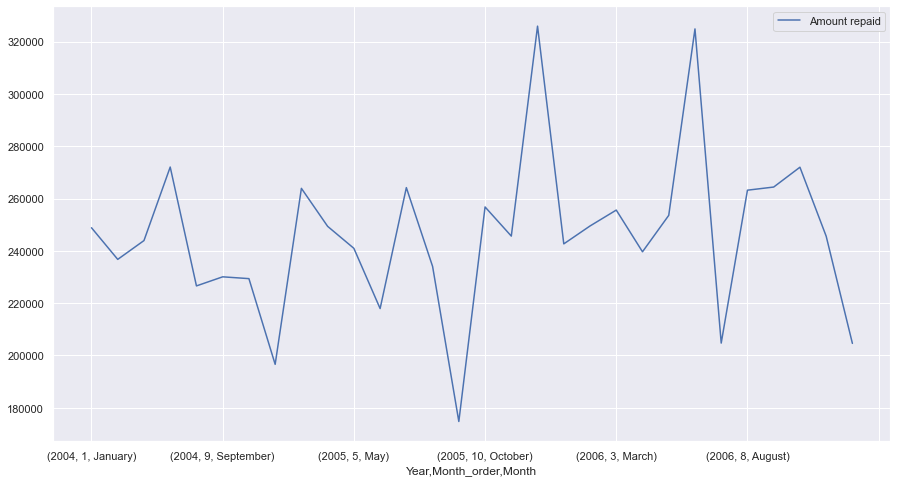

In [8]:
sns.set()
repay_df.plot(figsize=(15,8))

4. What kind of purchase of a good or service has been spend by the customers the most on in the year 2004? 

In [50]:
df1=df[df['Year']==2004]
df1.groupby('Type').agg({'Amount spent':'sum','Type':'count'}).sort_values(by='Amount spent',ascending=False)

,Amount spent,Type
Type,,
CAMERA,15808342.75,65
FOOD,14331230.55,56
FUEL,12406782.86,50
SHOPPING,11240559.07,44
BUS TICKET,9352736.78,34
AIR TICKET,8370914.59,35
CLOTHES,6869665.96,28
JEWELLERY,6491106.55,23
TRAIN TICKET,5079275.84,22


In [45]:
prod_spent = df.pivot_table(index=["Type"], columns=["Year"], values=["Amount spent"], aggfunc="sum")
prod_spent

Amount spent                          
Year                 2004         2005         2006
Type                                               
AIR TICKET     8370914.59  14495718.73  10088812.10
AUTO            837121.32   1756945.98   5414016.74
BIKE            880622.23   5940943.34   4729540.02
BUS TICKET     9352736.78   9978368.34   5223682.85
CAMERA        15808342.75  14246199.07  11427030.14
CAR            3458008.80     74247.30   3748068.79
CLOTHES        6869665.96   8089807.88   9691628.65
FOOD          14331230.55  11679385.25  11762722.63
FUEL          12406782.86  19045589.11  18410802.12
JEWELLERY      6491106.55   7067312.48   8683977.93
MOVIE TICKET   2749815.43   6706076.61  10188937.89
RENTAL         5005336.56   5840570.47   6103320.41
SANDALS        1611062.31   2286460.21   2513730.80
SHOPPING      11240559.07   7458312.37   9511483.07
TRAIN TICKET   5079275.84  13829647.60  14158153.71

In [10]:
prod_spent["Amount spent"].sort_values(by=2004, ascending=False)


Year,2004,2005,2006
Type,,,
CAMERA,15808342.75,14246199.07,11427030.14
FOOD,14331230.55,11679385.25,11762722.63
FUEL,12406782.86,19045589.11,18410802.12
SHOPPING,11240559.07,7458312.37,9511483.07
BUS TICKET,9352736.78,9978368.34,5223682.85
AIR TICKET,8370914.59,14495718.73,10088812.10
CLOTHES,6869665.96,8089807.88,9691628.65
JEWELLERY,6491106.55,7067312.48,8683977.93
TRAIN TICKET,5079275.84,13829647.60,14158153.71


Camera has been the most spent on item using credit card in the year 2004.

5. What kind of credit card has been used the most on an average to make purchases in the year 2006?

<AxesSubplot:xlabel='Month_order,Month'>

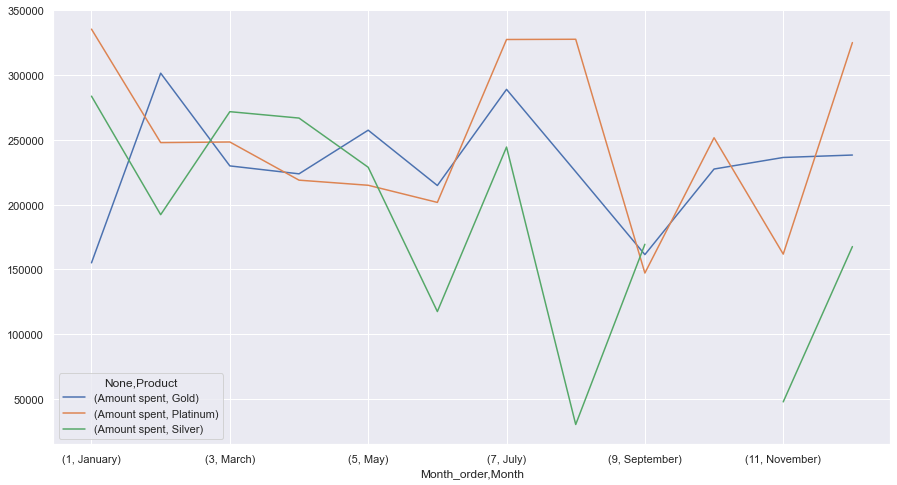

In [13]:
year2006 = df[df["Year"]==2006]
cc_type = year2006.pivot_table(index=["Month_order","Month"], columns=["Product"], values=["Amount spent"], aggfunc="mean")

sns.set()
cc_type.plot(figsize=(15,8))

####   Platinum credit card has been utilized the most for purchases and such in the year 2006.

In [51]:
from pandas_profiling import ProfileReportfileReport

In [52]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]